# Importing Libraries

In [624]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Reading in Data

In [625]:
data_feat = pd.read_csv("train_features.csv")
data_labels = pd.read_csv("train_labels.csv")

pd.set_option('display.max_columns', None)


In [626]:
data_feat.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [627]:
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Left-align the table below instead of centered which is default in Markdown:

In [628]:
%%html
<style>
table {float:left}
</style>

| Column_name   | Description
|:-|:---------------------------------------------------------
| amount_tsh  | Total static head (amount water available to waterpoint)|
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate  |
| wpt_name | Name of the waterpoint if there is one |
| num_private |  N/A |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga |  Geographic location  |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses  |
| management | How the waterpoint is managed  |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs  |
| water_quality | The quality of the water  |
| quality_group | The quality of the water  |
| quantity | The quantity of water |
| quantity_group | The quantity of water  |
| source | The source of the water  |
| source_type | The source of the water  |
| source_class | The source of the water  |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

Join the features csv with the labels csv into one training dataframe.

In [629]:
df = data_feat.merge(data_labels, on="id")
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
30513,17280,0.0,2011-03-18,World Bank,0,Rhoda,36.708723,-6.025794,Kwa Kipela,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Njoge,0,True,GeoData Consultants Ltd,VWC,Hemb,False,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
7383,53450,0.0,2013-01-25,Tasaf,115,Kilwa company,39.021346,-9.781331,Namayano,0,Ruvuma / Southern Coast,Kilima Hewa,Lindi,80,53,Ruangwa,Nambilanje,550,True,GeoData Consultants Ltd,VWC,NaN,True,2005,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
52007,4659,0.0,2011-03-07,Dwe,1704,DWE,34.937917,-9.339059,none,0,Rufiji,Wangamaganga,Iringa,11,4,Njombe,Yakobi,40,True,GeoData Consultants Ltd,VWC,Lukwal,False,2008,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
45627,27775,0.0,2011-08-07,Hesawa,1197,DWE,33.079242,-1.829284,Mmatende,0,Lake Victoria,Buyanja,Mwanza,19,1,Ukerewe,Bukiko,800,True,GeoData Consultants Ltd,NaN,NaN,True,1999,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,other,other,functional needs repair
49796,50568,0.0,2011-04-17,Danida,0,DWE,32.968188,-9.092451,Akim Twinzi,0,Lake Rukwa,Sinizya,Mbeya,12,6,Mbozi,Mlowo,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional


## Exploratory Data Analysis



In [630]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

The dataframe contains 41 columns and 59400 rows. There are null-values present in the following features:
* funder (object)
* installer (object)
* subvillage (object)
* public_meeting (object)
* scheme_management (object)
* scheme_name (object)
* permit (object)

All of the features share the same object data type and could indicate a human or equipment error. These features will require further investigation.

The data types for all features are as follows:
* 3 floats
* 7 ints
* 31 objects

The target label is also an object which will slow down our ML models further down the line compared to a category data type. The many objects data types could potentially also be converted into ones that more accurately reflect the data.

In [631]:
# pct of cells with missing values out of all cells
total_cells = np.product(df.shape)
total_missing_values = df.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 1.9%


Around 2% of cells contain null-values. However, there may be more null-values but just represented as empty cells, "N/A" strings or something else completely. Let's investigate the values inside features we have already identified as containing null-values.

In [632]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Exploring categorical features

It appears that the largest concentration of null-values exist in scheme_name which represent who is operating the waterpoints. Perhaps this is indicative of many water pumps not being maintained nor in operation.

In [633]:
print("Funder contains {} unique entities that have funded wells in Tanzania.".format(len(df.funder.unique())))
print("\nCount of each funder in the dataset:\n{}".format(df.funder.value_counts()))

Funder contains 1898 unique entities that have funded wells in Tanzania.

Count of each funder in the dataset:
Government Of Tanzania           9084
Danida                           3114
Hesawa                           2202
Rwssp                            1374
World Bank                       1349
Kkkt                             1287
World Vision                     1246
Unicef                           1057
Tasaf                             877
District Council                  843
Dhv                               829
Private Individual                826
Dwsp                              811
0                                 777
Norad                             765
Germany Republi                   610
Tcrs                              602
Ministry Of Water                 590
Water                             583
Dwe                               484
Netherlands                       470
Hifab                             450
Adb                               448
Lga            

Notice there are 777 observations of "0" likely to represent a null-value. This is in addition to the null-values and would need to be cleaned in the data cleaning section.

In [634]:
print("Installer contains {} unique entities with the name of the organisation that installed the well.".format(len(df.installer.unique())))
print("\nCount of each installer in the dataset:\n{}".format(df.installer.value_counts()))

Installer contains 2146 unique entities with the name of the organisation that installed the well.

Count of each installer in the dataset:
DWE                             17402
Government                       1825
RWE                              1206
Commu                            1060
DANIDA                           1050
KKKT                              898
Hesawa                            840
0                                 777
TCRS                              707
Central government                622
CES                               610
Community                         553
DANID                             552
District Council                  551
HESAWA                            539
World vision                      408
LGA                               408
WEDECO                            397
TASAF                             396
District council                  392
Gover                             383
AMREF                             329
TWESA                   

Again, we have 777 counts of "0" highly likely showing that for wells where funder is missing installer also is missing.

In [635]:
print("Subvillage contains {} unique entities with the geographic location of the wells.".format(len(df.subvillage.unique())))
print("\nCount of each subvillage in the dataset:\n{}".format(df.subvillage.value_counts()))

Subvillage contains 19288 unique entities with the geographic location of the wells.

Count of each subvillage in the dataset:
Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Miembeni          134
Msikitini         134
1                 132
Kibaoni           114
Kanisani          111
I                 109
Mapinduzi         109
Mjini             108
Mjimwema          108
Mkwajuni          104
Mwenge            102
Azimio             98
Mabatini           98
Mbugani            95
Mission            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Mwangamo            1
Nkwamwasi           1
Mkomahindo          1
Jikongo             1
Makandwa            1
Mazese              1
Nyamalebe C         1
Mnanga              1
Mviru          

The values "M", "1" and "I" appear to be null-values but required further analysis before we can determine they truly are missing values or incorrectly entered values due to human error.

In [636]:
print("Public_meeting contains {} unique entities evaluating to either True/False or null-value.".format(len(df.public_meeting.unique())))
print("\nCount of each public_meeting in the dataset:\n{}".format(df.public_meeting.value_counts()))

Public_meeting contains 3 unique entities evaluating to either True/False or null-value.

Count of each public_meeting in the dataset:
True     51011
False     5055
Name: public_meeting, dtype: int64


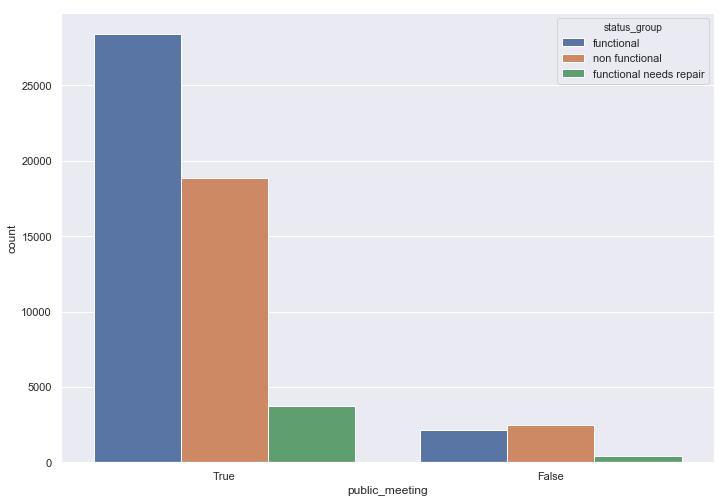

In [637]:
sns.countplot(data=df, x='public_meeting', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

It is not clear what public_meeting represents beyond true/false values but there are many more waterpoints that are functional or non-functional that evaluate to True in public_meeting.

In [638]:
print("Scheme_management contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_management.unique())))
print("\nCount of each scheme_management in the dataset:\n{}".format(df.scheme_management.value_counts()))

Scheme_management contains 13 unique entities with the names of who operates the waterpoints.

Count of each scheme_management in the dataset:
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


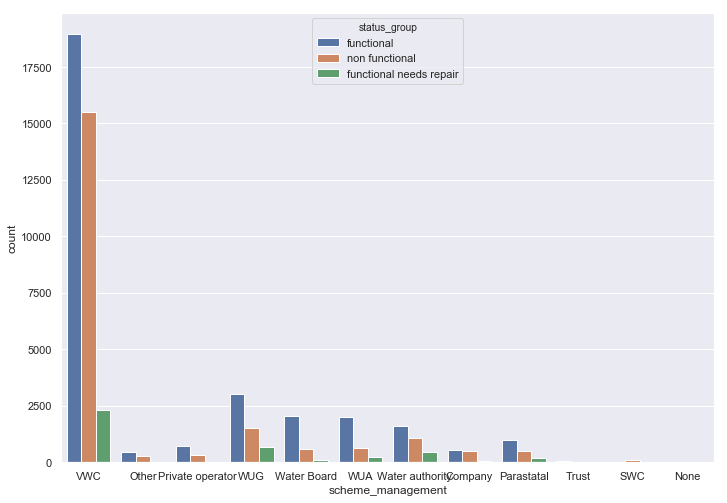

In [639]:
sns.countplot(data=df, x='scheme_management', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

While scheme_management and scheme_name appear to have the same column description their values are not identical.

In [640]:
print("Scheme_name contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_name.unique())))
print("\nCount of each scheme_name in the dataset:\n{}".format(df.scheme_name.value_counts()))

Scheme_name contains 2697 unique entities with the names of who operates the waterpoints.

Count of each scheme_name in the dataset:
K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Handeni Trun

In [641]:
print("Permit contains {} unique entities indicating whether waterpoints had permits".format(len(df.permit.unique())))
print("\nCount of each permit in the dataset:\n{}".format(df.permit.value_counts()))

Permit contains 3 unique entities indicating whether waterpoints had permits

Count of each permit in the dataset:
True     38852
False    17492
Name: permit, dtype: int64


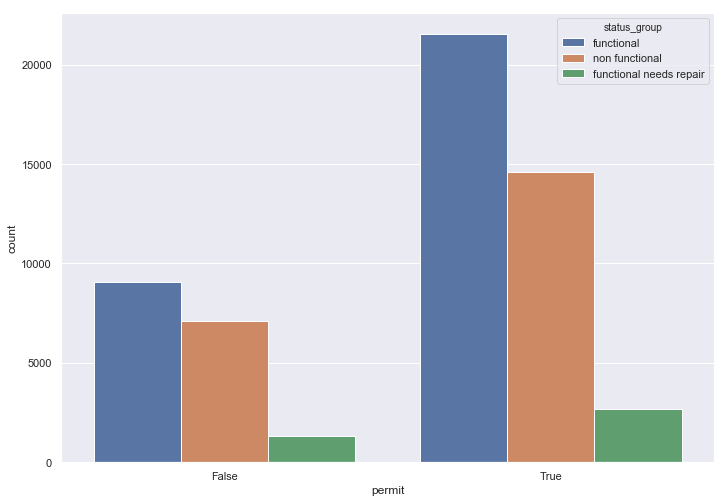

In [642]:
sns.countplot(data=df, x='permit', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

The net amount of waterpoints that are functional, non-functional and functional but needs repair are around twice as high for waterpoints that have a permit compared to those that don't. This means we have more data on waterpoints with a permit than those without.

### Exploring numerical features

Let's now explore the numerical features (dtypes ints and floats). They are as follows:
* amount_tsh (amount of water available to the waterpoint)
* gps_height (altitude of the well)
* longtitude (GPS coordinate)
* latitude (GPS coordinate)
* num_private (unknown)
* region_code (geographic location)
* district_code (geographic location)
* population (population around a well)
* construction_year (year the well was constructed)

The amount of water available to a waterpoint could be a proxy for how much a well is used and therefore could be closely correlated with the target labels we are trying to predict.

Amount of water available to the water point values range from 0.0 to 350000.0
Amount of water available distribution of values:  0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
             ...  
16000.00         2
16300.00         2
800.00           2
11000.00         2
590.00           2
520.00           2
26000.00         2
13000.00         2
9.00             1
170000.00        1
200000.00        1
900.00           1
0.25             1
53.00            1
350000.00      

C:\Users\ammar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



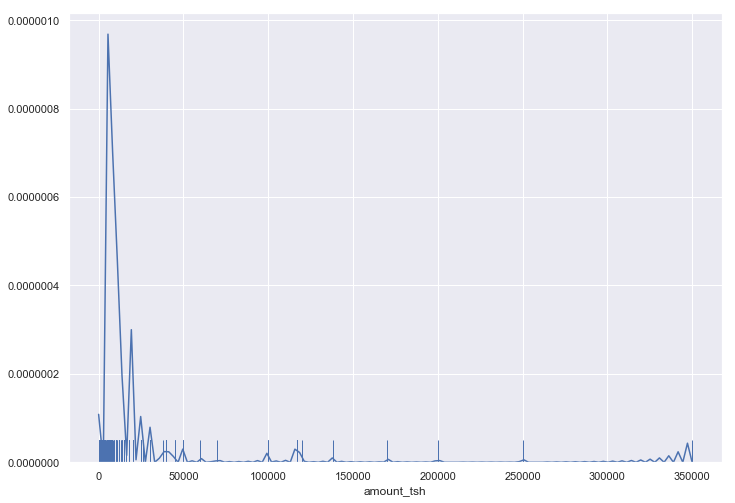

In [643]:
print("Amount of water available to the water point values range from {} to {}".format(df.amount_tsh.min(), df.amount_tsh.max()))
print("Amount of water available distribution of values: ", df.amount_tsh.value_counts())
sns.distplot(df.amount_tsh, hist=False, rug=True, bins=50)

Most of the values in "amount_tsh" range between 0 and 3,000 which means that the water available to pumps is in the lower end of the range through Tanzania.

Population values range from 0 to 30500
Distribution of Populationalue counts:  0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


C:\Users\ammar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



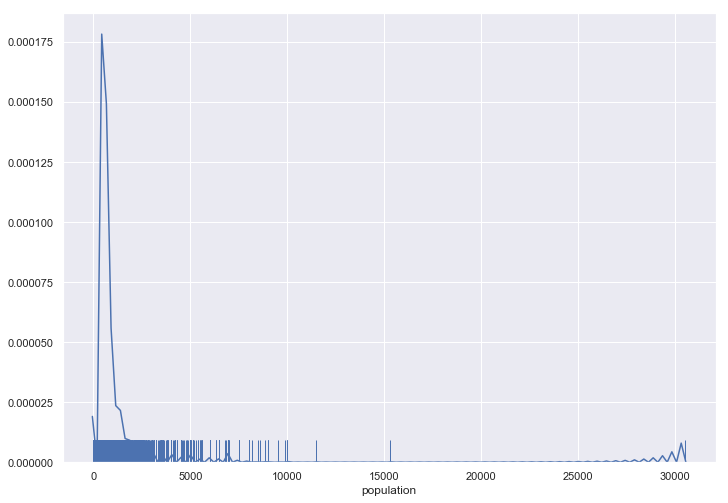

In [644]:
print("Population values range from {} to {}".format(df.population.min(), df.population.max()))
print("Distribution of Populationalue counts: ", df.population.value_counts())
sns.distplot(df.population, hist=False, rug=True, bins=50)


It is clear that "population" is skewed right (positive) with the highest count of populations between 1 nd 5,000 thus indicating we are dealing with extremely small communities around these waterpoints. There are a few population sizes above 30,000 as well. The distplot above indicates that values greater than 10,000 are likely outliers and will need to be cleaned pre-modelling.

In [645]:
df[['population', 'amount_tsh']].corr()

,population,amount_tsh
population,1.000000,0.016288
amount_tsh,0.016288,1.000000


Although the distribution of values for both amount_tsh and population look similar they are not at all closely correlated.

### Exploring target labels

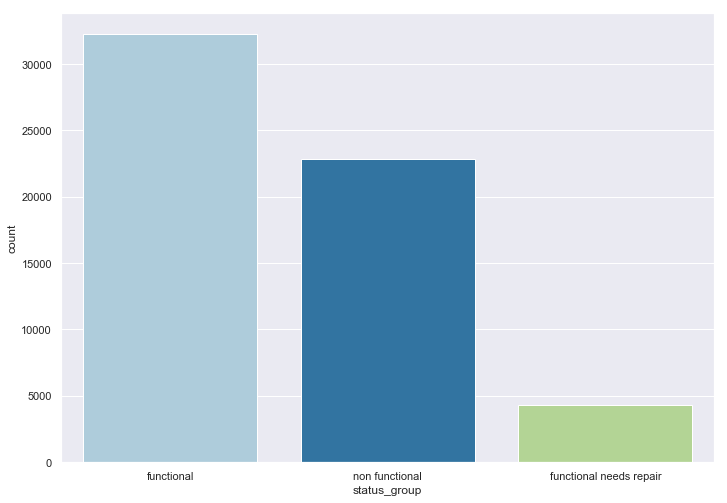

In [646]:
sns.countplot(data=df, x="status_group", palette="Paired")


In [647]:
labels_count = df.status_group.value_counts()
total_labels = df.status_group.count()
(labels_count/total_labels)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

The target label "functional" accounts for 54% of all labels in the dataset, and "non-functional" for 38%. The only significantly imbalanced class is "functional needs repair" which only accounts for 7% of the data.

### Correlations

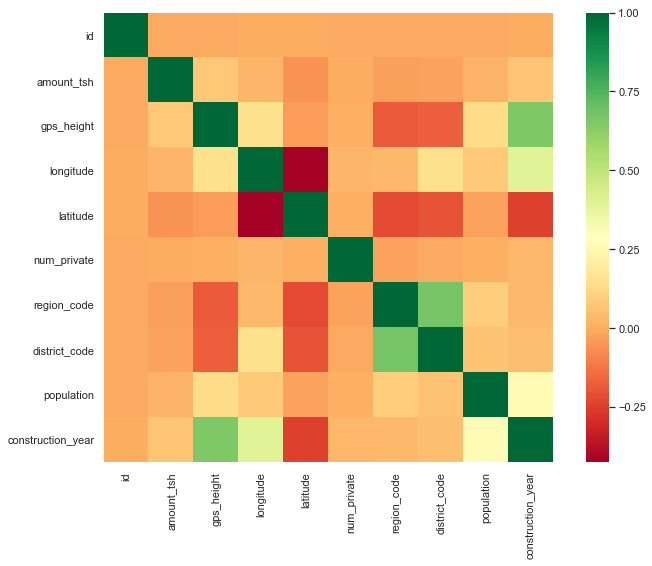

In [648]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

The heatmap shows "construction_year" and "gps_height" have a strong positive correlation. Likewise with "district_code" and "region_code". This indicates that we can potentially drop 2 features whereby reducing the dimensions used to train our model making it simpler and less prone to overfitting. This is due to the fact that when we have two correlated features one feature will explain the variance already and the other is not needed.

Latitude values range from -11.64944018 to -2e-08.


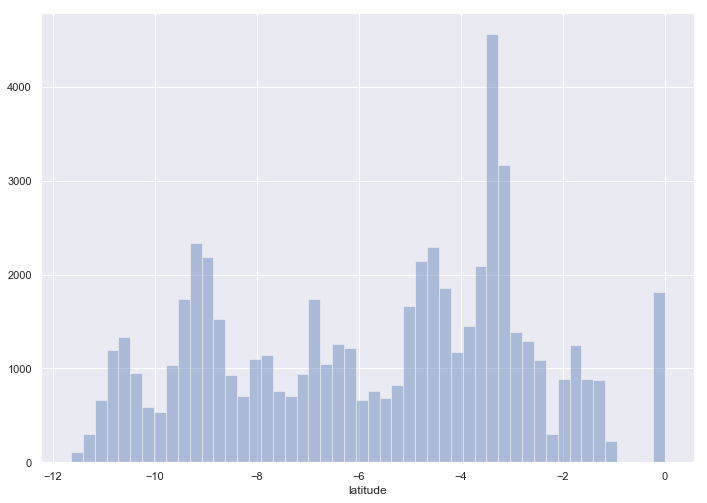

In [649]:
print("Latitude values range from {} to {}.".format(df.latitude.min(), df.latitude.max()))
sns.distplot(df.latitude, kde=False, bins=50, label="Distribution of waterpoints by Latitude")

Longitude values range from 0.0 to 40.34519307.


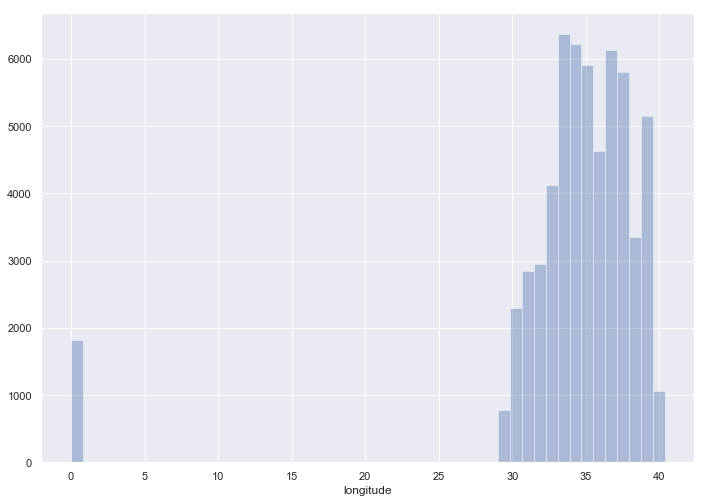

In [650]:
print("Longitude values range from {} to {}.".format(df.longitude.min(), df.longitude.max()))
sns.distplot(df.longitude, kde=False, bins=50, label="Distribution of waterpoints by Longitude")

In [651]:
print ("Distribution of longitude: ", df.longitude.value_counts())

Distribution of longitude:  0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
33.006275       2
39.103950       2
37.542785       2
36.802490       2
39.098374       2
33.090347       2
33.005032       2
32.978062       2
39.088875       2
31.619530       2
39.093095       2
39.105307       2
32.936689       2
32.987511       2
39.090880       2
37.314250       2
32.984790       2
39.091434       2
37.274352       2
32.919861       2
37.530515       2
32.955597       2
39.098514       2
32.988560       2
32.987670       2
             ... 
36.831815       1
31.530352       1
35.455622       1
37.672581       1
29.964104       1
34.862237       1
37.663466       1
37.128824       1
38.766058       1
38.710520       1
40.117029       1
34.672962       1
39.433604       1
35.901580       1
37.532216       1
35.790038       1
33.926958       1
37.371204       1
33.494134       1
34.462228       1
36.658880       1
33.877577       1
38.579468       1


The above visualisation for lat/long shows a negative left skew for longitude which means the data we have for water points are closer to each other horizontally but much more spread vertically. This is bit of information can prove to be interesting once we visualise the datapoints as a scatter plot on a Tanzanian map with the multiclass labels as hue to visualise whether there is a pattern for functional vs. broken down waterpoints.

It is also worth treating the outliers for longitude of 0.0 as they appear to be a clerical error. When plotted against a map it is south of the coast of Ghana.

In [652]:
# Changing dtypes to floats instead of int64
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [653]:
import plotly.plotly as py

mapbox_access_token = 'he94r1hchm'

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['wpt_name'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            )
        )]

layout = dict(
        title = 'Distribution of waterpoints',
        colorbar = True,   
        geo = dict(
            scope='africa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = dict( data=data, layout=layout )
url = py.plot( fig, validate=False, filename='d3-airports' )


C:\Users\ammar\Anaconda3\lib\site-packages\plotly\plotly\plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

C:\Users\ammar\Anaconda3\lib\site-packages\plotly\plotly\plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some sugge

## Data Preprocessing

### Data Cleaning

To-do:
- Convert "date_recorded" into datetime object.
- Convert target label 'status_group' into categorical dtype.
- Consider converting "0" into most popular category for "funder" and "installer"
- Compare model performance when removing "M", "1" and "I" in "subvillage" vs. keeping them.
- Compare model performance when removing "K", "M", "I", "N" and "S" in "scheme_name" vs. keeping them.
- Values greater than 10,000 in "population" appear to be outliers and needs cleaning.
- Convert "none" in "wpt_name" into most popular category.
- Clean the 0.0 in "longitude" values as they appear to be clerical errors.

In [654]:
# Convert date_recorded into a datetime object for further engineering
df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True, errors='ignore')

# Convert target feature into categorical to speed up training of the ML models
df['status_group'] = df['status_group'].astype('category')

### Feature Engineering

In [655]:
# Creating new features from the date_recorded feature representing the date the row was entered into the dataset.
df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month 
df['week_of_year_recorded'] = df['date_recorded'].dt.weekofyear
df['day_of_week_recorded'] = df['date_recorded'].dt.dayofweek
df['day_of_year_recorded'] = df['date_recorded'].dt.dayofyear
df['quarter_of_date_recorded'] = df['date_recorded'].dt.quarter


# Transform "construction_year" dtype into int to do operations so we can calculate the years difference 
# from when a waterpoint was constructed and when it was last checked.
df['construction_year'] = df['construction_year'].astype("int64")
df['age_of_pump'] = df['year_recorded'].values - df['construction_year'].values

# Sanity checking the new features compared to date_recorded
df[['date_recorded',
    'construction_year',
    'year_recorded',  
    'age_of_pump',
    'month_recorded',
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].head(10)

,date_recorded,construction_year,year_recorded,age_of_pump,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded
0,2011-03-14,1999,2011,12,3,11,0,73,1
1,2013-03-06,2010,2013,3,3,10,2,65,1
2,2013-02-25,2009,2013,4,2,9,0,56,1
3,2013-01-28,1986,2013,27,1,5,0,28,1
4,2011-07-13,0,2011,2011,7,28,2,194,3
5,2011-03-13,2009,2011,2,3,10,6,72,1
6,2012-10-01,0,2012,2012,10,40,0,275,4
7,2012-10-09,0,2012,2012,10,41,1,283,4
8,2012-11-03,0,2012,2012,11,44,5,308,4
9,2011-08-03,0,2011,2011,8,31,2,215,3


In [656]:
df[['date_recorded',
    'year_recorded', 
    'construction_year', 
    'age_of_pump',
    'month_recorded', 
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].dtypes

date_recorded               datetime64[ns]
year_recorded                        int64
construction_year                    int64
age_of_pump                          int64
month_recorded                       int64
week_of_year_recorded                int64
day_of_week_recorded                 int64
day_of_year_recorded                 int64
quarter_of_date_recorded             int64
dtype: object

All the new features created off of date_recorded pass the sanity checks and all share the int64 data type. This is important as they are now numerical values required for most machine learning models.

In [657]:
# Dropping date_recorded as we have engineered new features based on it.
df.drop('date_recorded',axis=1, inplace=True, errors='ignore')
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,11,0,73,1,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,10,2,65,1,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,9,0,56,1,4
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,5,0,28,1,27
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,28,2,194,3,2011


We can create an additional feature by doing the following calculation ('amount_tsh' / 'population') which will return the proportion of water available to a waterpoint out of the full population nearby.

In [658]:
df['water_relative_to_pop'] = df['amount_tsh'].values - df['population'].values
print("water relative to population values range: ", df['water_relative_to_pop'].value_counts())

water relative to population values range:   0.0         20713
-1.0          4915
-200.0        1388
-150.0        1276
-250.0        1132
-300.0         985
-100.0         906
-500.0         763
-350.0         762
-50.0          754
-120.0         647
-400.0         624
-60.0          435
-30.0          403
-80.0          363
 49.0          359
-130.0         345
-450.0         340
-600.0         320
-20.0          319
-40.0          315
-230.0         301
 19.0          267
 350.0         260
-70.0          255
 200.0         253
 1000.0        246
-180.0         240
 999.0         216
 250.0         202
             ...  
-11.0            1
 9700.0          1
 39850.0         1
 4289.0          1
-1394.0          1
-2518.0          1
 2895.0          1
 6338.0          1
 294.0           1
 4966.0          1
 1878.0          1
 868.0           1
-2890.0          1
 1755.0          1
 13690.0         1
 4860.0          1
 169850.0        1
-6800.0          1
 438.0           1
 322.0

Although there are disproportionately more negative values in the amount of water available out of population nearby this is the reality in Tanzania. Water availability is scarce in Tanzania, in fact according to water.org only 50% of Tanzania's population of 53 million have access to an improved source of safe water. This is the reason why Tanzanians spend a significant amount of time travelling some distance to collect water.

In [659]:
df.dtypes

id                             int64
amount_tsh                   float64
funder                        object
gps_height                     int64
installer                     object
longitude                    float64
latitude                     float64
wpt_name                      object
num_private                    int64
basin                         object
subvillage                    object
region                        object
region_code                    int64
district_code                  int64
lga                           object
ward                          object
population                     int64
public_meeting                object
recorded_by                   object
scheme_management             object
scheme_name                   object
permit                        object
construction_year              int64
extraction_type               object
extraction_type_group         object
extraction_type_class         object
management                    object
m

In [660]:
print ("There are {} unique names out of {} unique waterpoints".format(df['wpt_name'].nunique(), df.shape[0]))
print ("This is because there are many waterpoints that have 'none' as their names as seen here:\n", df['wpt_name'].value_counts())

There are 37400 unique names out of 59400 unique waterpoints
This is because there are many waterpoints that have 'none' as their names as seen here:
 none                          3563
Shuleni                       1748
Zahanati                       830
Msikitini                      535
Kanisani                       323
Bombani                        271
Sokoni                         260
Ofisini                        254
School                         208
Shule Ya Msingi                199
Shule                          152
Sekondari                      146
Muungano                       133
Mkombozi                       111
Madukani                       104
Mbugani                         94
Hospital                        94
Upendo                          93
Kituo Cha Afya                  90
Mkuyuni                         88
Umoja                           84
Center                          83
Ccm                             81
Kisimani                        78
Ofisi Ya 

There is another interesting finding when digging deeper into wpt_names. There is a mixture of Swahili and English words which is likely due to that both Swahili and English are the most commonly spoken languages in Tanzania but it makes the data dirty.

1748 of waterpoints share the name Shuleni as seen in wpt_name. According to Google Translate it means 'at school' which probably means that the waterpoint is in proximity to a school. Below is a list of the most frequent names for water wells and their translation into English:
- Shuleni = at school (can potentially be cleaned to be merged with the English "school" below)
- Zahanati = dispensary
- Msikitini = mosque
- Kanisani = church
- Bombani = bomb (?)
- Sokoni = coconut (?)
- Ofisini = office
- School
- Shule Ya Msingi = primary school (can potentially be cleaned to be merged with the English "school")
- Shule = school (can be cleaned to be merged with the English "school")
- Sekondari = secondary (likely referring to secondary school, cleaned and merged with English "school")
- Muungano = in the congregation
- Mkombozi = redeemer (?)
- Madukani = shopping
- Mbugani = wilderness
- Hospital
- Upendo = love (?)
- Kituo Cha Afya = health center
- Mkuyuni = in the snow (?)
- Umoja = unity (?)
- Center
- Ccm (?)
- Kisimani = well
- Ofisi Ya Kijiji = village office
- Mtakuja = you are coming (?)
- Tankini = ?
- Bwawani = sister (?)
- Songambele = ?
- Maendeleo = advancement (?)


In [661]:
# Merging Swahili and English terms into English
lang_mapping = {
    "Shuleni": "School",
    "Shule Ya Msingi": "School",
    "Shule": "School",
    "Sekondari": "School",
    "Kituo Cha Afya":"Center",
}
df['wpt_name'] = df['wpt_name'].replace(lang_mapping)
df.sample(1000)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump,water_relative_to_pop
14748,19900,0.0,Government Of Tanzania,0,WEDECO,33.269736,-4.303561e+00,Upina,0,Lake Tanganyika,Upina,Tabora,14,1,Nzega,Mihugi,0,False,GeoData Consultants Ltd,VWC,NaN,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2013,2,7,1,43,1,2013,0.0
8760,72652,0.0,Government Of Tanzania,0,Government,33.779063,-3.063688e+00,Kwa Hung'Wa,0,Lake Victoria,Mwankali,Shinyanga,17,2,Maswa,Buchambi,0,True,GeoData Consultants Ltd,Water authority,Maswa Water supply program,False,0,gravity,gravity,gravity,private operator,commercial,pay monthly,monthly,soft,good,enough,enough,dam,dam,surface,communal standpipe,communal standpipe,functional,2012,10,42,1,290,4,2012,0.0
53567,59125,0.0,Government Of Tanzania,0,Government,33.816286,-3.443766e+00,Kwa Lugata,0,Internal,Budekwa Kati,Shinyanga,17,2,Maswa,Budekwa,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,other,other,other,vwc,user-group,other,other,soft,good,dry,dry,machine dbh,borehole,groundwater,other,other,non functional,2012,10,42,4,293,4,2012,0.0
51207,31924,1500.0,Rc Church,1359,RC CHURCH,37.912726,-4.145585e+00,Zahanati,0,Pangani,Mwerera,Kilimanjaro,3,3,Same,Mshewa,200,True,GeoData Consultants Ltd,Water authority,Tutu,True,2010,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair,2013,3,11,3,73,1,3,1300.0
30642,35604,1000.0,Kkkt,1742,Commu,34.323274,-9.471239e+00,none,0,Lake Nyasa,Kipipule,Iringa,11,3,Makete,Ipepo,0,True,GeoData Consultants Ltd,VWC,Maliwa,False,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,9,6,65,1,15,1000.0
23066,72294,0.0,Government Of Tanzania,1551,District council,37.600365,-3.251317e+00,Kwa Sixtus,0,Pangani,Onya,Kilimanjaro,3,1,Rombo,Mengwe Manda,1,True,GeoData Consultants Ltd,Company,Onya water supply,True,1980,gravity,gravity,gravity,company,commercial,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2013,3,10,2,65,1,33,-1.0
1943,3842,0.0,Government Of Tanzania,284,RWE,36.930568,-7.737700e+00,Ofisini,0,Rufiji,Itefa,Morogoro,5,3,Kilombero,Sanje,800,True,GeoData Consultants Ltd,VWC,Msolwa U,True,1986,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011,3,13,1,88,1,25,-800.0
48606,3006,0.0,Vwc,0,VWC,30.828366,-2.574295e+00,Ofisi Ya Kijiji,0,Lake Victoria,Mshikamano,Kagera,18,30,Ngara,Rusumo,0,True,GeoData Consultants Ltd,VWC,Kamatendeli spring source,False,0,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair,2011,7,28,3,195,3,2011,0.0
58753,71582,0.0,Koica,0,GOVER,35.968000,-6.430496e+00,Mataji,0,Wami / Ruvu,Isangha,Dodoma,1,4,Chamwino,Idifu,0,True,GeoData Consultants Ltd,VWC,Idif,True,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal stan

In [662]:
school_strings = []
for string in df['wpt_name']:
    if ('School' in string or 'Shule' in string or 'school' in string or 'shule' in string):
        school_strings.append(string)
print (school_strings)

['School', 'School', 'Ruhoma Primary School', 'School', 'School', 'Miembeni Primary School', 'Lonange Secschool', 'School', 'Mdabwa Primary School', 'School', 'School', 'Tattabigo Shule Ya Msingi', 'School', 'School', 'School', 'Ngatuni Primary School', 'Shule Ya Msingi Kavifuti', 'School', 'School', 'School', 'School', 'School', 'Shule Ya Msingi Ihungo', 'School', 'Kabigwa Primary School', 'School', 'Shule Ya Msingi Okaoni', 'Shule Ya Sekondari Lukangao', 'School', 'School', 'School', 'School', 'School', 'Kisimiri Juu Primary School', 'School', 'School', 'Kilimani Primary School', 'School', 'School', 'School', 'School', 'School', 'Maweni Primary School', 'School', 'School', 'School', 'Jihu Primary School', 'School', 'Shule Ya Viziwi Mugeza', 'Shule Ya Secondari', 'Misugusugu Primary School', 'Mbwawa Secondary School', 'Bembeza Primary School', 'Gumba Primary School 3', 'Busami Secschool', 'School', 'Shule Ya Msingi Mgaraganza', 'School', 'Shule Ya Viziwi Mugeza', 'School', 'School', '

It is obvious there are many variations of schools which we should combine into a single 'school' string.

In [668]:
# Merging all string values with same meaning into one string to prepare for one-hot encoding.
df['wpt_name'] = ['School' if 'School' in item 
                  or 'school' in item 
                  or 'Shule' in item
                  or 'Shuleni' in item
                  or 'shuleni' in item
                  or 'shule' in item 
                  or 'secondary' in item
                  or 'Secondary' in item
                  or 'Primary' in item
                  or 'primary' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['For_person' if 'Kwa' in item else item for item in df['wpt_name']]
df['wpt_name'] = ['Church' if 'Church' in item
                  or 'church' in item
                  or 'Kanisani' in item
                  or 'kanisani' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['Mosque' if 'Mosque' in item
                  or 'mosque' in item
                  or 'Msikitini' in item
                  or 'msikitini' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['Medical' if 'Zahanati' in item
                  or 'Hospital' in item
                  or 'hospital' in item
                  or 'Kituo Cha Afya' in item
                  or 'Center' in item
                  or 'Afya' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['Office' if 'Ofisini' in item
                  or 'ofisini' in item
                  or 'Ofisi' in item
                  or 'ofisi' in item
                  or 'Office' in item
                  or 'office' in item
                  else item for item in df['wpt_name']]
print(df.groupby('wpt_name')['status_group'].value_counts().sort_values(ascending=False))

wpt_name              status_group           
For_person            functional                 12040
                      non functional              9535
School                functional                  2887
none                  functional                  2630
School                non functional              2112
For_person            functional needs repair     1676
none                  non functional               857
Medical               functional                   764
                      non functional               575
School                functional needs repair      520
Church                functional                   336
Mosque                functional                   290
Church                non functional               264
Office                functional                   250
                      non functional               247
Mosque                non functional               245
Bombani               functional                   158
Sokoni             

In [ ]:
# Identify all categorical features
df_objects = df.select_dtypes(include=['object'])


# One-hot encode categorical features
pd.get_dummies(df_objects, drop_first=True, sparse=True)


### Dimensionality Reduction

#### Feature Selection

## Hyperparameter Tuning

To-do:
* Compare validation score when dropping either "construction_year" or "gps_height" due to positive correlation.
* Compare validation score when dropping either "district_code" or "region_code" for the same reason.